In [1]:
import sys 
sys.path.append('../') 
import numpy as np 
import matplotlib.pyplot as plt 
from VQE import VQE 
from qiskit.providers.aer import AerSimulator 
from qiskit.providers.aer.noise import NoiseModel  
from utils import * 
from qiskit import IBMQ, Aer, QuantumCircuit 
from qiskit.circuit.library import EfficientSU2 
from qiskit.utils.quantum_instance import QuantumInstance 
from qiskit.algorithms import NumPyMinimumEigensolver 
from qiskit.algorithms.optimizers import SPSA 
from GroupingAlgorithm import grouping, groupingWithOrder 
from HEEM_VQE_Functions import * 
from qiskit.circuit.random import random_circuit 
from qiskit.compiler import transpile 

In [2]:
IBMQ.load_account()
provider      = IBMQ.get_provider(hub='ibm-q-csic', group='internal', project='iff-csic') 
backend_exp   = provider.get_backend('ibmq_guadalupe') 
WC_exp        = get_backend_connectivity(backend_exp) 
#backend_sim = Aer.get_backend( 'aer_simulator' ) 
backend_sim = AerSimulator.from_backend(backend_exp) 
shots = 2**13 

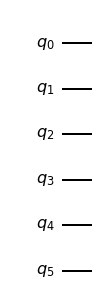

In [7]:
H, variational_circuit = BeH2(initial_state=True) 
num_qubits = H.num_qubits 
variational_circuit = QuantumCircuit(num_qubits) 
#variational_circuit.compose( EfficientSU2( num_qubits, reps=1, entanglement='linear' ),  inplace=True ) 
num_params = variational_circuit.num_parameters 
variational_circuit.decompose().draw(output='mpl') 

In [8]:
params = np.pi*np.random.randn(num_params)
paulis, coeff, labels = Label2Chain( H )
Groups, Measurements, T = groupingWithOrder( paulis, G = WC_exp )
prob2Exp = probability2expected( coeff, labels, Groups, Measurements)
circuits = [ measure_circuit_factor( measure , num_qubits )[0].compose( variational_circuit, front=True  ).assign_parameters(params)
            for measure in Measurements ]

c:\Users\lucia\Nextcloud\Programas\Github\Hardware-efficient-variational-quantum-eigensolver-with-entangled-measurements\Codes\experiments\..\HEEM_VQE_Functions.py:301: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  circuit.u2(np.pi / 2, np.pi, qubits[0])


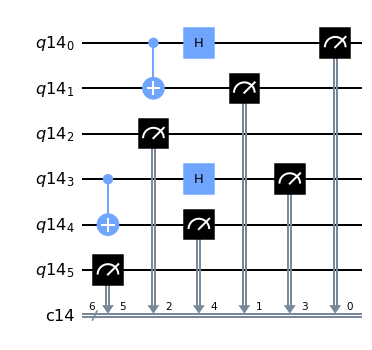

In [9]:
circuits[3].draw(output='mpl')

In [10]:
Measurements

[[[2, [0]], [5, [1, 3]], [2, [2]], [4, [4, 5]]],
 [[1, [2]], [4, [0, 1]], [2, [3]], [8, [4, 5]]],
 [[2, [5]], [7, [3, 4]], [2, [0]], [7, [1, 2]]],
 [[3, [5]], [4, [3, 4]], [3, [2]], [4, [0, 1]]],
 [[3, [3]], [4, [4, 5]], [1, [2]], [6, [0, 1]]],
 [[1, [3]], [1, [0]], [4, [1, 2]], [4, [4, 5]]],
 [[3, [0]], [4, [1, 2]], [2, [5]], [9, [3, 4]]],
 [[1, [3]], [1, [0]], [6, [1, 2]], [6, [4, 5]]],
 [[3, [4]], [3, [3]], [3, [5]], [2, [2]], [7, [0, 1]]],
 [[3, [0]], [3, [5]], [6, [1, 2]], [6, [3, 4]]],
 [[1, [2]], [1, [5]], [4, [3, 4]], [4, [0, 1]]],
 [[3, [1]], [3, [2]], [1, [0]], [2, [5]], [9, [3, 4]]],
 [[3, [0]], [3, [5]], [1, [1]], [1, [4]], [1, [3]], [1, [2]]],
 [[3, [3]], [3, [2]], [1, [1]], [1, [4]], [1, [0]], [1, [5]]],
 [[3, [3]], [3, [5]], [1, [4]], [1, [0]], [1, [2]], [1, [1]]],
 [[3, [0]], [3, [2]], [1, [1]], [1, [3]], [1, [5]], [1, [4]]],
 [[1, [3]], [1, [0]], [1, [2]], [1, [5]], [3, [1]], [0, [4]]],
 [[3, [1]], [3, [4]], [3, [0]], [3, [2]], [3, [3]], [3, [5]]]]